<a href="https://colab.research.google.com/github/starkjones/NYC-CONDOMINIUM-COMPARABLE-RENTAL-INCOME-ANALYSIS/blob/main/NYC_Condo_Comp_RI__Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **NYC CONDOMINIUM COMPARABLE RENTAL INCOME ANALYSIS**

Jonathan Jones

22.05.05

In [85]:
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **PRIMARY DATASET**

1) Source of data:

  https://data.cityofnewyork.us/Housing-Development/DOF-Condominium-Comparable-Rental-Income-Manhattan/ad4c-mphb

2) Brief description of data

 NYC Condominiums with similar features are compared and assessed as rental units. 

3) What is the target?

  MANHATTAN CONDOMINIUM PROPERTY Est. Gross Income

4) Is this a classification or regression problem?

  This is regression problem as the target value is not limited to a finite number of classes or values. 

5) How many features?

  46-1(target) columns = 45 features (TBD). I will undoubtedly drop several more columns once I begin to look through the data more closely.  

6) How many rows of data.

  1068

7) What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?

 This dataset has a lot of columns, the challenge lies in determining which columns will be the most effective for predicting our target values. 

In [86]:
data = '/content/drive/MyDrive/SI/DOF__Condominium_Comparable_Rental_Income___Manhattan___FY_2009_2010.csv'
df = pd.read_csv(data)
df.head(5)

,MANHATTAN CONDOMINIUM PROPERTY Boro-Block-Lot,MANHATTAN CONDOMINIUM PROPERTY Condo Section,MANHATTAN CONDOMINIUM PROPERTY Address,Borough,Postcode,Latitude,Longitude,Community Board,Council District,Census Tract,...,COMPARABLE RENTAL 2 Neighborhood,COMPARABLE RENTAL 2 Building Classification,COMPARABLE RENTAL 2 Total Units,COMPARABLE RENTAL 2 Year Built,COMPARABLE RENTAL 2 Gross SqFt,COMPARABLE RENTAL 2 Est. Gross Income,COMPARABLE RENTAL 2 Gross Income per SqFt,COMPARABLE RENTAL 2 Full Market Value,COMPARABLE RENTAL 2 Market Value per SqFt,COMPARABLE RENTAL 2 Dist. from Coop in miles
0,1-00007-7501,735-R1,1 COENTIES SLIP,1,10004.0,40.703627,-74.010607,1.0,1.0,9,...,SOUTHBRIDGE,C7-WALK-UP,12,"1,900","17,475","732,000",41.9,"3,670,000",210.0,0.55
1,1-00015-7502,1557-R1,20 WEST STREET,1,10004.0,40.706358,-74.016151,1.0,1.0,13,...,FINANCIAL,D8-ELEVATOR,650,"2,003","627,330","25,002,565",39.9,"125,000,000",199.0,0.50
2,1-00016-7501,308-R1,377 RECTOR PLACE,1,10280.0,40.709506,-74.018002,1.0,1.0,"31,704",...,TRIBECA,D8-ELEVATOR,341,"1,998","357,000","13,358,015",37.4,"67,000,000",188.0,0.00
3,1-00016-7502,313-R1,320 ALBANY STREET,1,10280.0,40.710165,-74.016751,1.0,1.0,"31,704",...,TRIBECA,D8-ELEVATOR,341,"1,998","357,000","13,358,015",37.4,"67,000,000",188.0,0.00
4,1-00016-7503,385-R1,250 SOUTH END AVENUE,1,10280.0,40.709709,-74.016560,1.0,1.0,"31,704",...,TRIBECA,D8-ELEVATOR,341,"1,998","357,000","13,358,015",37.4,"67,000,000",188.0,0.00


## **PRIMARY DATASET**

In [87]:
# Shape of data frame:

df.shape

# 1068 rows 
# 46 columns

(1068, 46)

In [88]:
# # Unadulterated copy for Machine Learning:

df_ML = df.copy()

In [89]:
# Preliminary check of column names, datatypes and entry quantities:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   MANHATTAN CONDOMINIUM PROPERTY Boro-Block-Lot           1068 non-null   object 
 1   MANHATTAN CONDOMINIUM PROPERTY Condo Section            1068 non-null   object 
 2   MANHATTAN CONDOMINIUM PROPERTY Address                  1068 non-null   object 
 3   Borough                                                 1068 non-null   int64  
 4   Postcode                                                1053 non-null   float64
 5   Latitude                                                1053 non-null   float64
 6   Longitude                                               1053 non-null   float64
 7   Community Board                                         1053 non-null   float64
 8   Council District                      

In [90]:
# Changing all column names to lowercase:

df.columns = df.columns.str.lower()

In [91]:
# Check:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 46 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   manhattan condominium property boro-block-lot           1068 non-null   object 
 1   manhattan condominium property condo section            1068 non-null   object 
 2   manhattan condominium property address                  1068 non-null   object 
 3   borough                                                 1068 non-null   int64  
 4   postcode                                                1053 non-null   float64
 5   latitude                                                1053 non-null   float64
 6   longitude                                               1053 non-null   float64
 7   community board                                         1053 non-null   float64
 8   council district                      

##**DATA CLEANING & PREPARATION**

In [92]:
# Check for duplciated rows:

df.duplicated().sum()

0

In [93]:
df['nta'].value_counts()

SoHo-TriBeCa-Civic Center-Little Italy                                         109
Hudson Yards-Chelsea-Flatiron-Union Square                                      99
Upper West Side                                                                 95
Upper East Side-Carnegie Hill                                                   88
West Village                                                                    88
Turtle Bay-East Midtown                                                         62
Lincoln Square                                                                  60
Lenox Hill-Roosevelt Island                                                     57
Midtown-Midtown South                                                           44
Battery Park City-Lower Manhattan                                               43
Yorkville                                                                       38
Murray Hill-Kips Bay                                                            35
East

In [94]:
# Removal of ineffectual columns:
remove = {'borough','manhattan condominium property boro-block-lot', 
          'comparable rental 2  boro-block-lot','bin', 'bbl',
          'manhattan condominium property condo section', 
          'census tract', ' comparable rental 1 boro-block-lot', 'postcode', 'community board'}
df.drop(columns = remove, inplace = True)

In [95]:
# Check for missing values:

df.isna().sum()

manhattan condominium property address                     0
latitude                                                  15
longitude                                                 15
council district                                          15
nta                                                       15
manhattan condominium property neighborhood                0
manhattan condominium property building classification     0
manhattan condominium property total units                 0
manhattan condominium property year built                  0
manhattan condominium property gross sqft                  0
manhattan condominium property est. gross income           0
manhattan condominium property gross income per sqft       0
manhattan condominium property full market value           0
manhattan condominium property market value per sqft       0
comparable rental 1 address                                0
comparable rental 1  neighborhood                          0
comparable rental 1  bui

Imputation Strategy: 

Forward fill:       

missing 15 / 1068 or 01.40 % of entries
missing 23 / 1068 or 02.15 % of entries

postcode                                                  15
latitude                                                  15
longitude                                                 15
community board                                           15
council district                                          15
census tract                                              15
bin                                                       23
bbl                                                       23
nta                                                       15

reviews per month: missing 57 / 1068 or 05.33 % of its entries

comparable rental 2  boro-block-lot                       57
comparable rental 2  address                              57
comparable rental 2  neighborhood                         57
comparable rental 2  building classification              57
comparable rental 2  total units                          57
comparable rental 2  year built                           57
comparable rental 2  gross sqft                           57
comparable rental 2  est. gross income                    57
comparable rental 2  gross income per sqft                57
comparable rental 2  full market value                    57
comparable rental 2  market value per sqft                57
comparable rental 2  dist. from coop in miles             57


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 36 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   manhattan condominium property address                  1068 non-null   object 
 1   latitude                                                1053 non-null   float64
 2   longitude                                               1053 non-null   float64
 3   council district                                        1053 non-null   float64
 4   nta                                                     1053 non-null   object 
 5   manhattan condominium property neighborhood             1068 non-null   object 
 6   manhattan condominium property building classification  1068 non-null   object 
 7   manhattan condominium property total units              1068 non-null   object 
 8   manhattan condominium property year bu

In [153]:
lon = df['longitude'].mean()

-73.98025663014987

In [154]:
# Imputation:

df['latitude'].fillna(40.775608, inplace =True)
df['longitude'].fillna(lon, inplace =True)
df['council district'].fillna('N/A', inplace =True)
df['nta'].fillna('Missing', inplace =True)


# latitude                                                  15
# longitude                                                 15
# council district                                          15
# nta                                                       15

In [128]:
df['comparable rental 2  dist. from coop in miles']

0       0.55
1       0.50
2       0.00
3       0.00
4       0.00
        ... 
1063    3.05
1064    4.25
1065    0.10
1066    3.75
1067    0.40
Name: comparable rental 2  dist. from coop in miles, Length: 1068, dtype: float64

In [130]:
df['comparable rental 2  address'].fillna('Missing', inplace =True)
df['comparable rental 2  neighborhood'].fillna('Missing', inplace =True)
df['comparable rental 2  building classification'].fillna('Missing', inplace =True)
df['comparable rental 2  total units'].fillna(341, inplace =True)
df['comparable rental 2  year built'].fillna(1980, inplace =True)
df['comparable rental 2  gross sqft'].fillna(357000, inplace =True)
df['comparable rental 2  est. gross income'].fillna(2664906, inplace =True)
df['comparable rental 2  gross income per sqft'].fillna(37.40, inplace =True)
df['comparable rental 2  full market value'].fillna(125000000, inplace =True)
df['comparable rental 2  market value per sqft'].fillna(188, inplace =True)
df['comparable rental 2  dist. from coop in miles'].fillna(0.50, inplace =True)

# comparable rental 2  address                              57
# comparable rental 2  neighborhood                         57
# comparable rental 2  building classification              57
# comparable rental 2  total units                          57
# comparable rental 2  year built                           57
# comparable rental 2  gross sqft                           57
# comparable rental 2  est. gross income                    57
# comparable rental 2  gross income per sqft                57
# comparable rental 2  full market value                    57
# comparable rental 2  market value per sqft                57
# comparable rental 2  dist. from coop in miles             57

In [131]:
# Final check for missing values:

df.isna().sum()

manhattan condominium property address                    0
latitude                                                  0
longitude                                                 0
council district                                          0
nta                                                       0
manhattan condominium property neighborhood               0
manhattan condominium property building classification    0
manhattan condominium property total units                0
manhattan condominium property year built                 0
manhattan condominium property gross sqft                 0
manhattan condominium property est. gross income          0
manhattan condominium property gross income per sqft      0
manhattan condominium property full market value          0
manhattan condominium property market value per sqft      0
comparable rental 1 address                               0
comparable rental 1  neighborhood                         0
comparable rental 1  building classifica

In [147]:
# Change columns to correct datatype using a foreloop:



In [148]:
# Checking value names in object columns for inconsistencies:

datatypes = df.dtypes
object_cols = datatypes[datatypes =='object'].index
object_cols

for column in object_cols:
  print(f'Column Name = {column}')
  print('\n')
  print(df[column].value_counts(dropna=False))
  print('\n\n')

Column Name = manhattan condominium property address


2 AMSTERDAM AVENUE       2
352 CATHEDRAL PARKWAY    2
1049 5 AVENUE            2
450 WEST 17 STREET       2
301 WEST 57 STREET       2
                        ..
210 WEST 19 STREET       1
140 7 AVENUE             1
270 WEST 19 STREET       1
160 7 AVENUE             1
571 ACADEMY STREET       1
Name: manhattan condominium property address, Length: 1062, dtype: int64



Column Name = council district


4.0     203
3.0     198
1.0     187
6.0     134
2.0     114
5.0      96
9.0      53
7.0      45
8.0      17
N/A      15
10.0      6
Name: council district, dtype: int64



Column Name = nta


SoHo-TriBeCa-Civic Center-Little Italy                                         109
Hudson Yards-Chelsea-Flatiron-Union Square                                      99
Upper West Side                                                                 96
West Village                                                                    89
Upper East Side

In [149]:
# Check for insconsistencies and odd numeric entries:

df.describe().round(1)

,latitude,longitude,manhattan condominium property gross income per sqft,manhattan condominium property market value per sqft,comparable rental 1 gross income per sqft,comparable rental 1 market value per sqft,comparable rental 1 dist. from coop in miles,comparable rental 2 gross income per sqft,comparable rental 2 market value per sqft,comparable rental 2 dist. from coop in miles
count,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0,1068.0
mean,40.8,-74.0,34.0,164.3,36.7,178.8,0.5,36.9,180.0,0.6
std,0.0,0.0,7.5,42.3,9.4,53.2,0.5,9.9,56.0,0.5
min,40.7,-74.0,0.0,5.8,10.6,27.9,0.0,10.1,28.8,0.0
25%,40.7,-74.0,29.8,138.0,30.8,147.0,0.2,31.0,149.0,0.2
50%,40.8,-74.0,34.0,163.0,36.9,185.0,0.4,37.4,188.0,0.4
75%,40.8,-74.0,39.0,195.2,43.5,218.0,0.7,42.9,215.0,0.8
max,40.9,-73.9,65.0,328.0,76.0,381.0,4.6,78.0,391.0,4.5


##**VISUAL ANALYSIS**

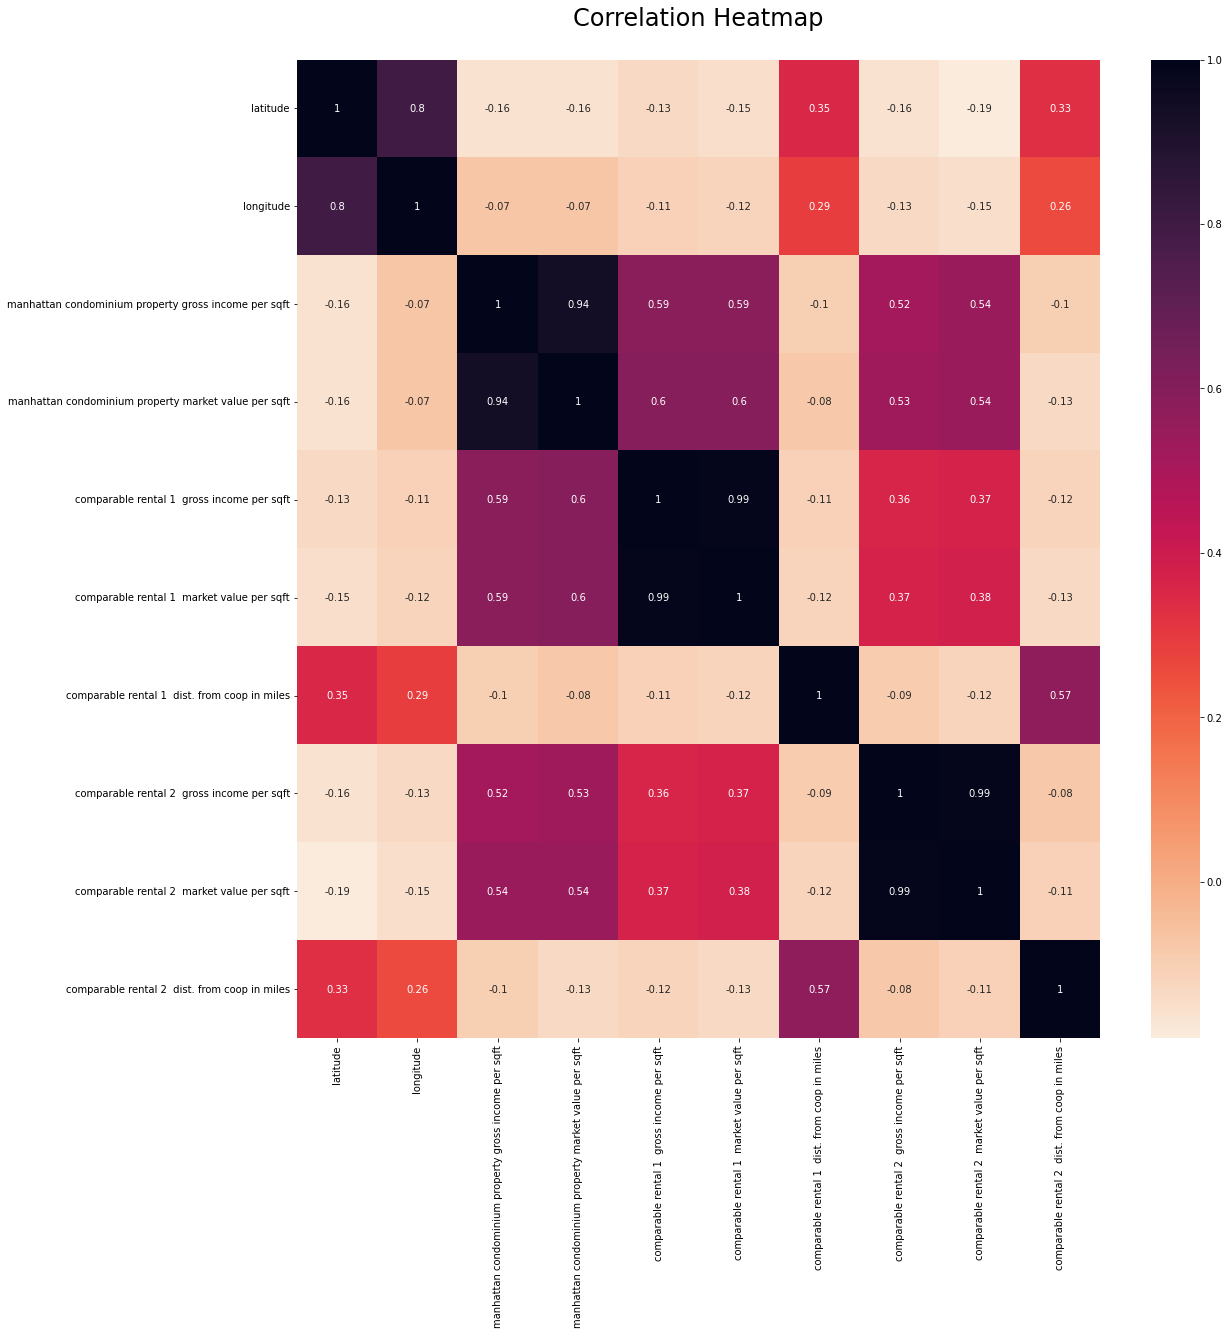

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation map to ascertain related features:

correlation = df.corr().round(2)

fig, hm = plt.subplots(nrows=1, ncols =1, figsize=(18,18));
hm = sns.heatmap(correlation, cmap='rocket_r', annot=True);
hm.set_title('Correlation Heatmap\n', fontsize= 24);

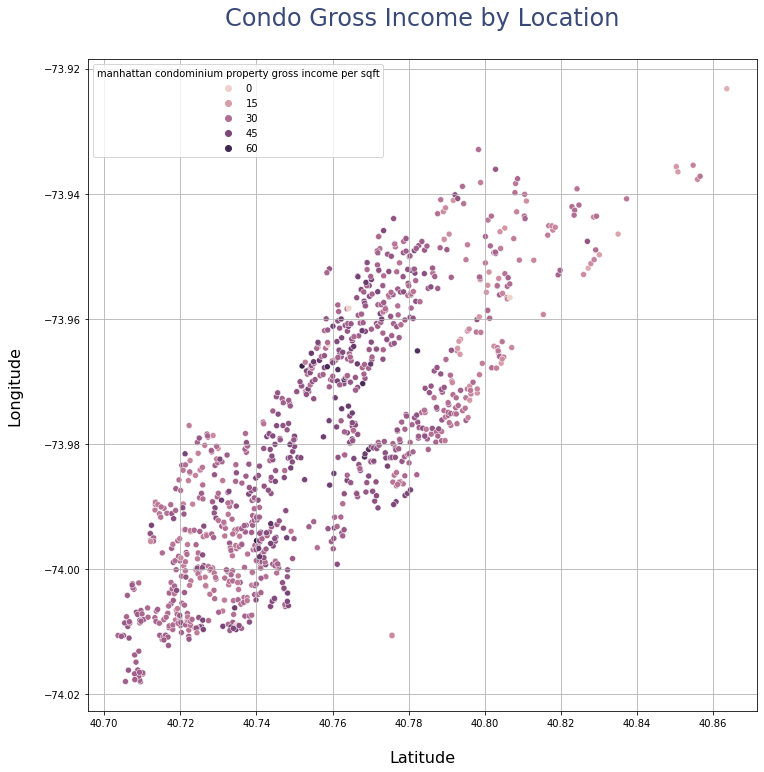

In [177]:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(12,12));
loc = sns.scatterplot(data =df,x='latitude', y= 'longitude', hue = 'manhattan condominium property gross income per sqft');
loc.set_title('Condo Gross Income by Location\n', color= '#081d58', alpha= .8, fontsize =24);
plt.xlabel('\nLatitude', fontsize = 16);
plt.ylabel('Longitude\n', fontsize = 16);
plt.grid('both')

In [155]:
import plotly.express as px

px.scatter_mapbox(df, lat='latitude',lon='longitude',color='manhattan condominium property market value per sqft',
                  mapbox_style="open-street-map")


## Analysis:

A color coded map makes distinctions between areas clear and easy to interpret. The highest market values (represented by warming purple to yellow hues) are concentrated towards the center of the island between mid thirty streets and the mid sixties. Prices appear to decrease linearly as we move further north, away from Central Park's northern bound; Central Park North.

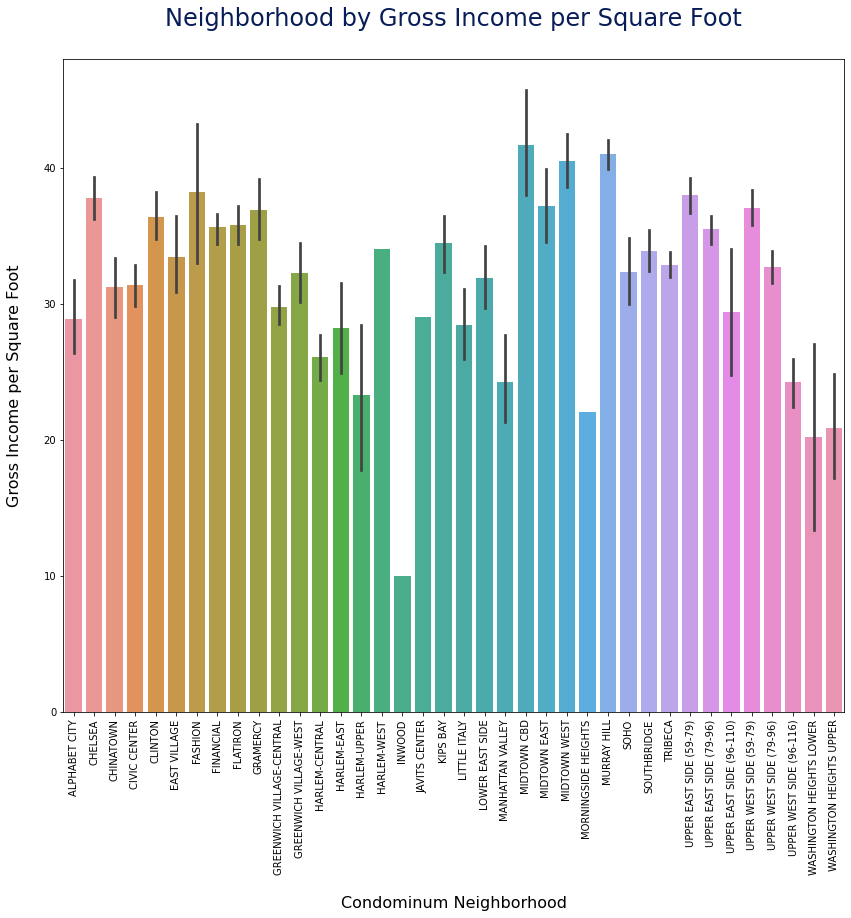

In [136]:
fig, axes = plt.subplots(nrows=1, ncols =1, figsize=(14,12));
neighbors = df['manhattan condominium property neighborhood'].sort_values(ascending =True)
condoloc = sns.barplot(data =df, x= neighbors, y= 'manhattan condominium property gross income per sqft');
plt.title('Neighborhood by Gross Income per Square Foot\n', color= '#081d58', fontsize =24)
plt.xlabel('\nCondominum Neighborhood', fontsize = 16)
plt.ylabel('Gross Income per Square Foot\n', fontsize =16)
plt.xticks(rotation= '90');

## Analysis:

The graph above provides a summary of the most and least expensive neighborghoods on the island of Manhattan. We can see that the Midown Central Business District (CBD) is the most expensive and Inwood at the northern most point of the island is the least expensive. 